#  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> <m>Contents:

[Problem 1 - Time Series Analysis for Sparkling wine dataset](#Problem_1)
    
    Questions:
[1.1](#1.1)
[1.2](#1.2)
[1.3](#1.3)
[1.4](#1.4)
[1.5](#1.5)
[1.6](#1.6)
[1.7](#1.7)
[1.8](#1.8)
[1.9](#1.9)
[1.10](#1.10)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 1 - Time Series Analysis
<a id='Problem_1'></a>
    
<font color=darkblue>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

 </font> 

In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import month_plot,plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

#Filter warnings
import warnings
warnings.filterwarnings('ignore')

<b> 1.1) Read the data as an appropriate Time Series data and plot the data. </b>
<a id='1.1'></a>

In [3]:
#Import the Sparking dataset
df = pd.read_csv("Sparkling.csv")
display(df.head(),df.tail())

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [4]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df.drop('YearMonth', axis = 1, inplace = True)
df.set_index('Time_Stamp',inplace=True)
display(df.head(),df.tail())

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


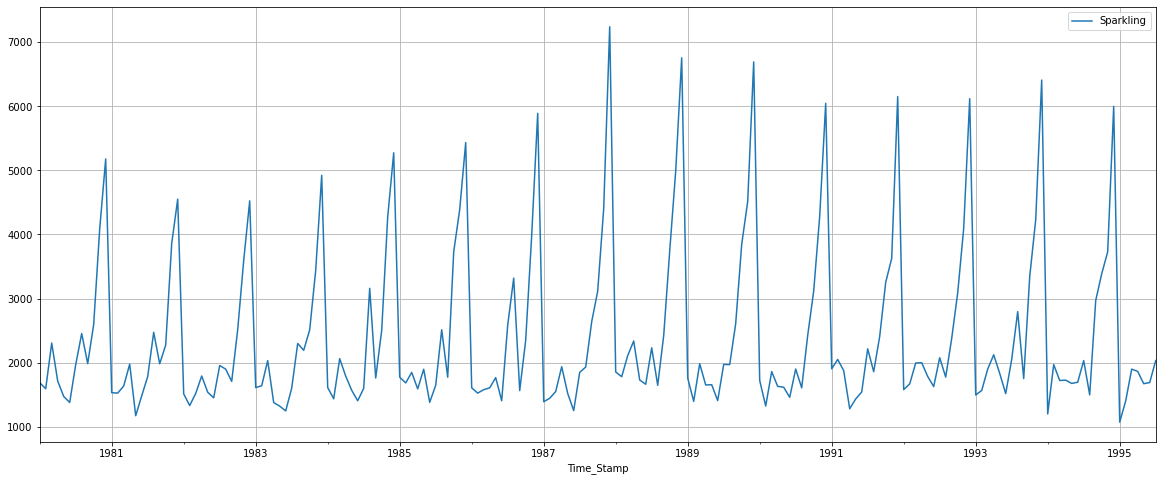

In [7]:
#Plot the data
df.plot()
plt.grid();

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


<b> 1.2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. </b>
<a id='1.2'></a>

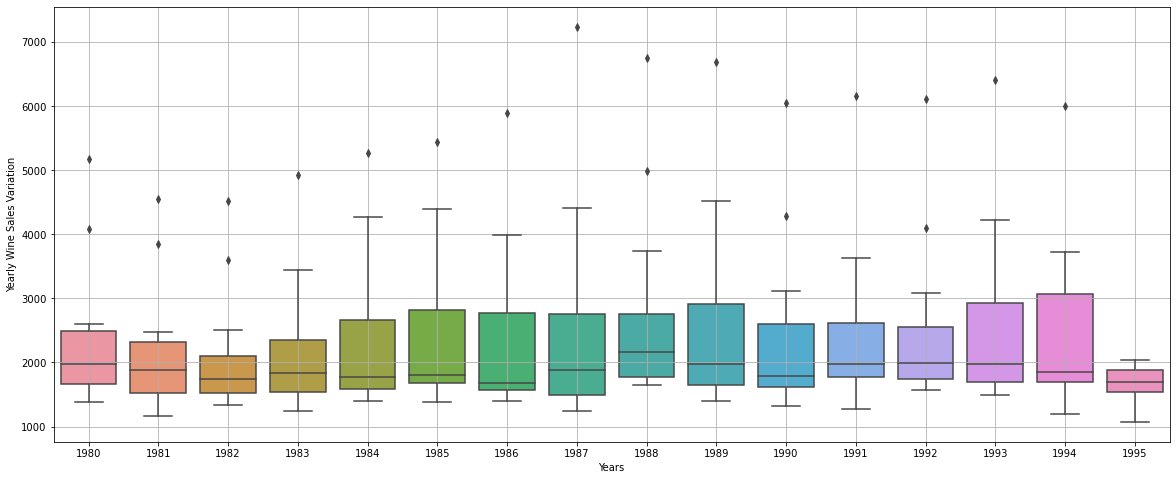

In [10]:
#Boxplot of year wise wine sales

sns.boxplot(df.index.year,df['Sparkling'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

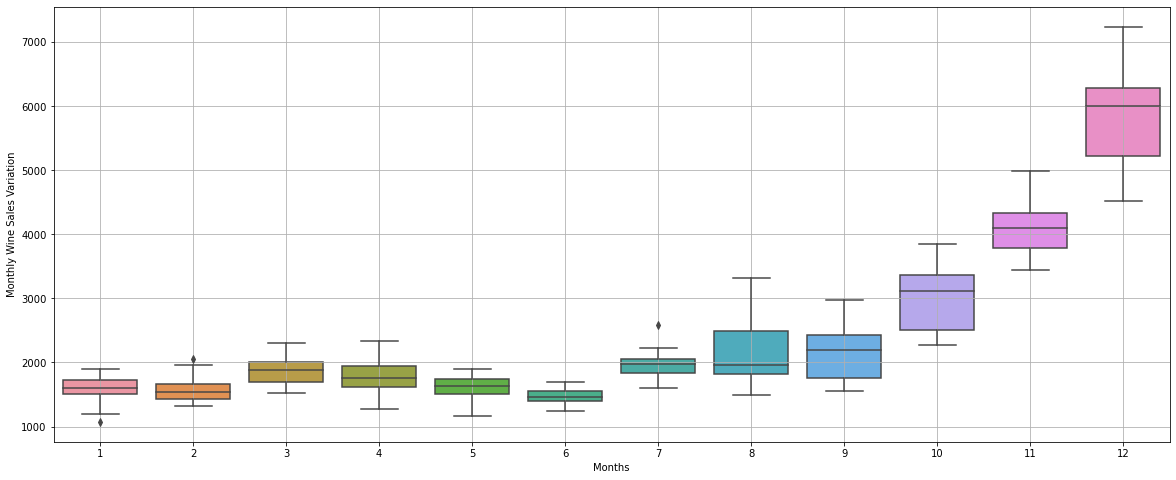

In [11]:
#Boxplot of month wise wine sales

sns.boxplot(df.index.month,df['Sparkling'])
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales Variation');

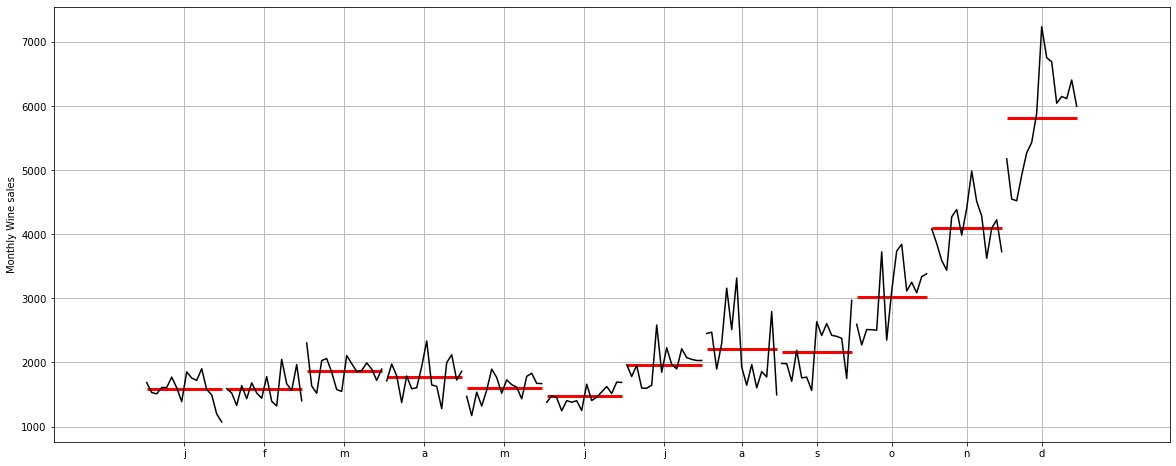

In [12]:
#Month plot 
month_plot(df,ylabel='Monthly Wine sales',)
plt.grid();

In [13]:
#Pivot table for getting the yearly sales across months
y_months = pd.pivot_table(df,values = 'Sparkling',columns = df.index.month, index = df.index.year)
y_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


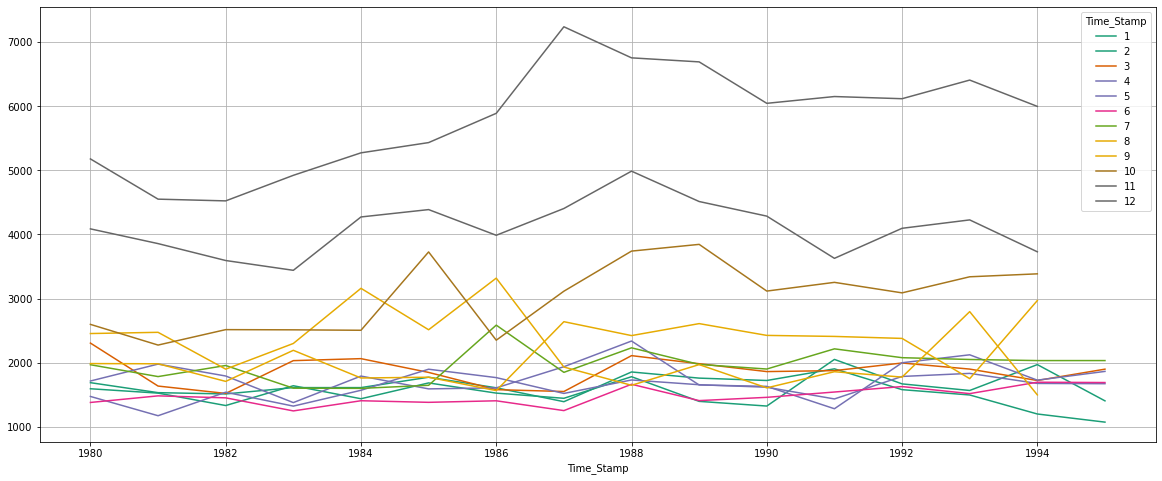

In [16]:
y_months.plot(colormap ='Dark2')
plt.grid();

,Sparkling
Time_Stamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


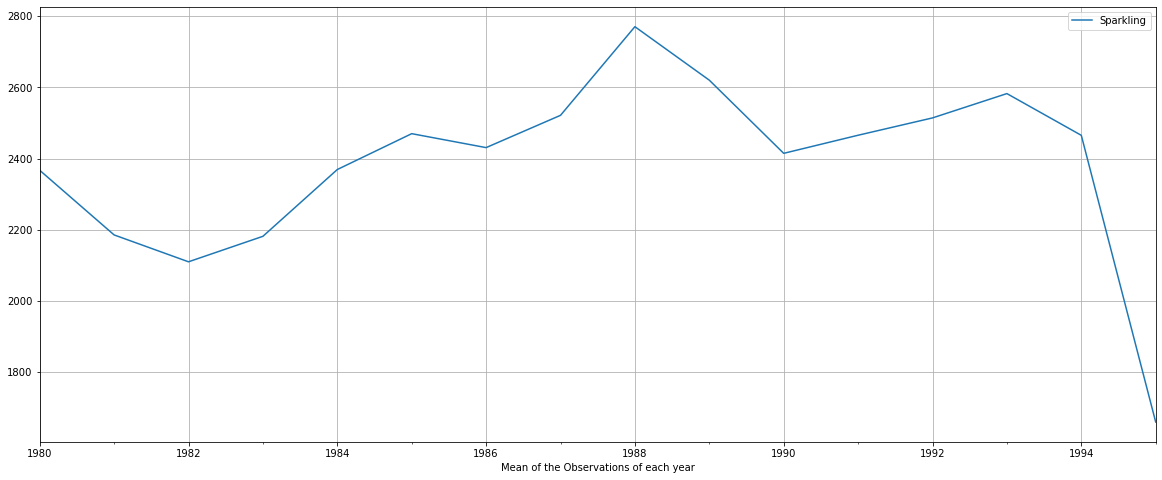

In [17]:
#Resample for Yearly plot

df_yearly = df.resample('A').mean()
display(df_yearly.head())

df_yearly.plot();
plt.grid();
plt.xlabel('Mean of the Observations of each year');

,Sparkling
Time_Stamp,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


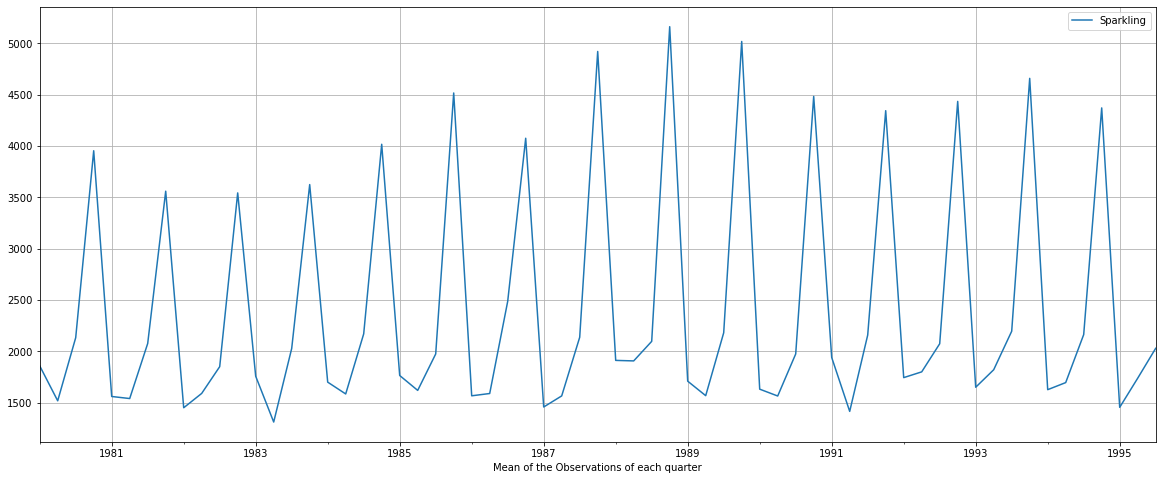

In [35]:
#Resample for Quarterly plot

df_quarterly = df.resample('Q').mean()
display(df_quarterly.head())

df_quarterly.plot();
plt.grid();
plt.xlabel('Mean of the Observations of each quarter');

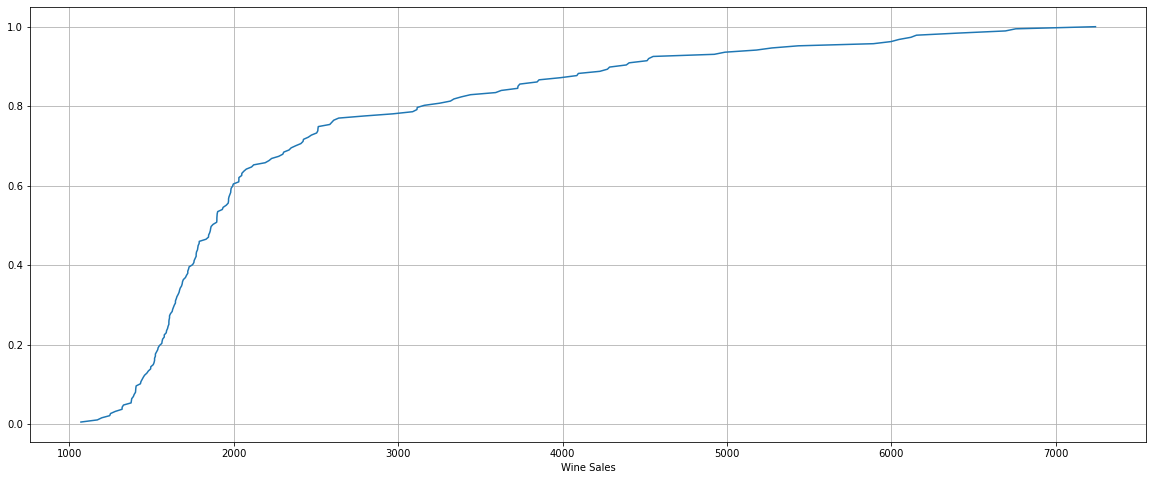

In [36]:
#Empirical cummulative distribution plot

cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "ECDF Plot");
plt.grid()
plt.xlabel('Wine Sales');

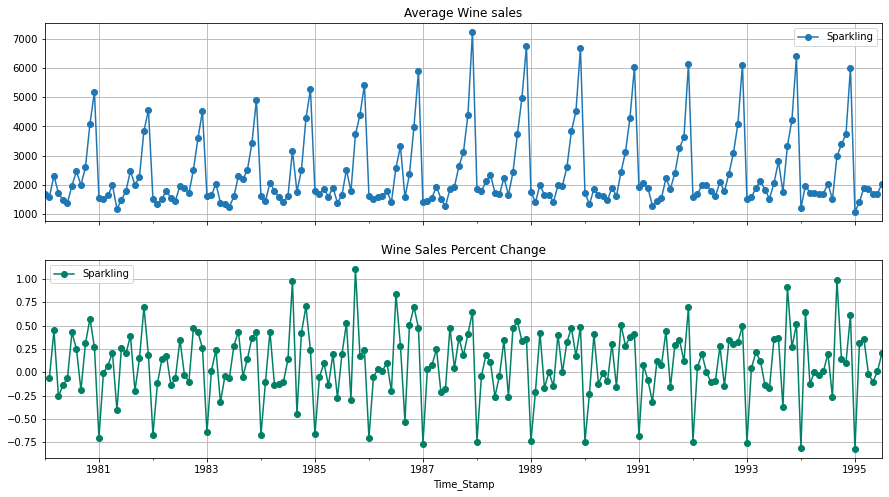

In [20]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)

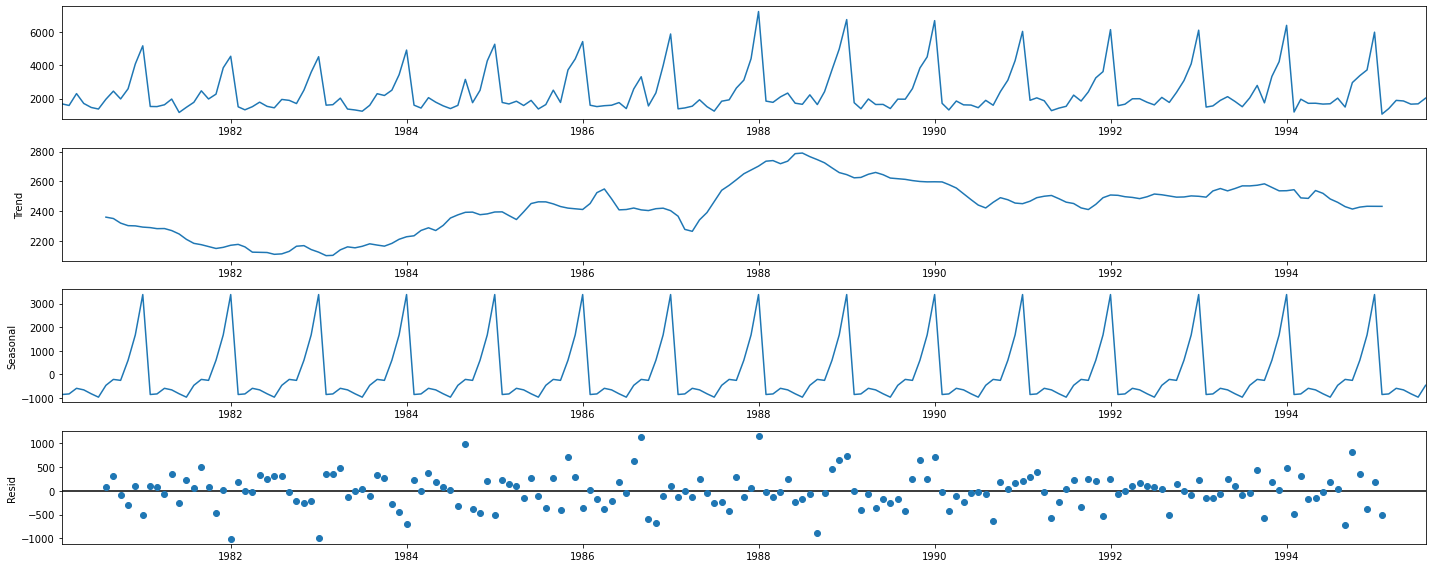

In [21]:
#Additive decomposition

decomp_add = seasonal_decompose(df,model='additive')
decomp_add.plot();

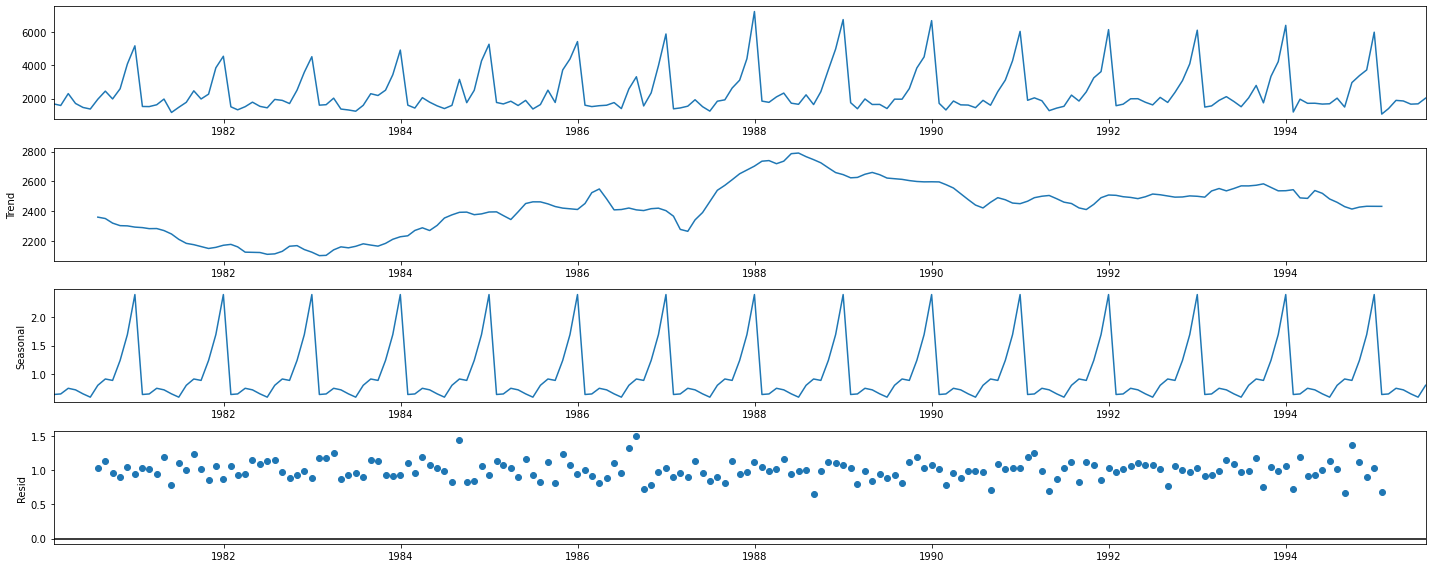

In [22]:
#Multiplicative decomposition

decomp_mul = seasonal_decompose(df,model='multiplicative')
decomp_mul.plot();

In [23]:
trend = decomp_mul.trend
seasonality = decomp_mul.seasonal
residual = decomp_mul.resid

trend1 = decomp_add.trend
seasonality1 = decomp_add.seasonal
residual1 = decomp_add.resid


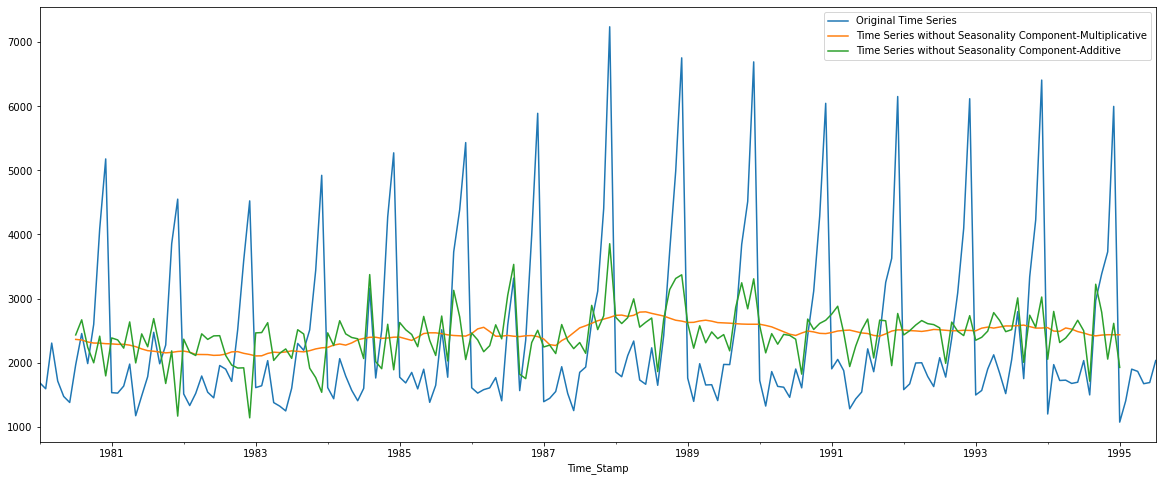

In [27]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts_add = trend1 +residual1

df.plot()
deaseasonalized_ts.plot()
deaseasonalized_ts_add.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component-Multiplicative",'Time Series without Seasonality Component-Additive']);

<b> 1.3) Split the data into training and test. The test data should start in 1991. </b>
<a id='1.3'></a>

In [28]:
#Split the data

train    =   df[df.index.year < 1991] 
test     =   df[df.index.year >=1991]

#Shape of test and train
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [29]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



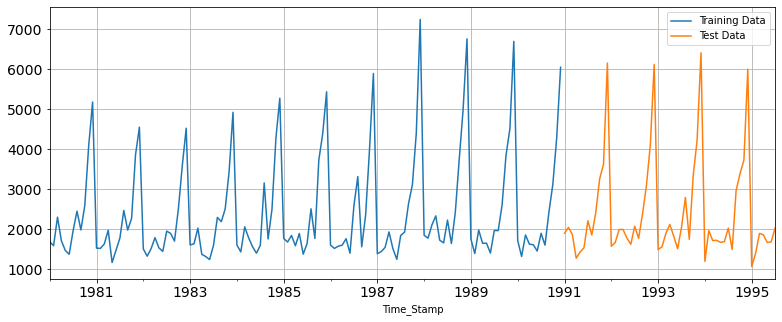

In [30]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<b> 1.4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. </b>
<a id='1.4'></a>

In [31]:
#Defining a function for performance on test data using RMSE
main_res = pd.DataFrame()
def performance(pred, model):
    #Test data RMSE
    rmse_test = mean_squared_error(test['Sparkling'],pred,squared=False)
    print("For {} forecast on the Test Data,  RMSE is {}" .format(model,(rmse_test).round(3)))
    result= pd.DataFrame({'Test RMSE': [rmse_test]},index=[model])
    return(result)


###### Model 1: Linear Regression

In [32]:
#Adding a time variable to the dataset
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [33]:
#Create a copy of the original dataset

LR_train = train.copy()
LR_test = test.copy()

LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



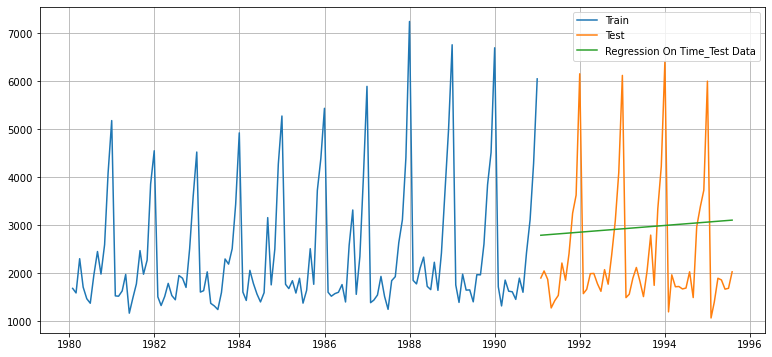

In [34]:
#Build the model
lr = LinearRegression()
#Fit the model
lr.fit(LR_train[['time']],LR_train['Sparkling'].values)

test_pred_LR  = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_pred_LR

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [35]:
#Model performance

res1 = performance(test_pred_LR,'Linear Regression')
main_res = pd.concat([main_res,res1])
main_res

For Linear Regression forecast on the Test Data,  RMSE is 1389.135


,Test RMSE
Linear Regression,1389.135175


###### Naive model

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

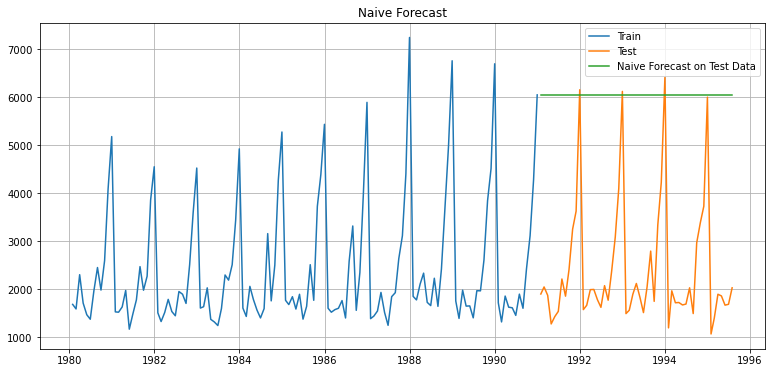

In [36]:
#Create a copy of the original dataset
NM_train = train.copy()
NM_test = test.copy()
#Creating a column in test dataset with value of last entry in train dataset
NM_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
display(NM_test['naive'].head())
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(NM_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NM_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
#Model performance

res2 = performance(NM_test['naive'],'Naive Model')
main_res = pd.concat([main_res,res2])
main_res

For Naive Model forecast on the Test Data,  RMSE is 3864.279


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352


###### Simple Average model

Time_Stamp
1991-01-31    2403.780303
1991-02-28    2403.780303
1991-03-31    2403.780303
1991-04-30    2403.780303
1991-05-31    2403.780303
Name: average, dtype: float64

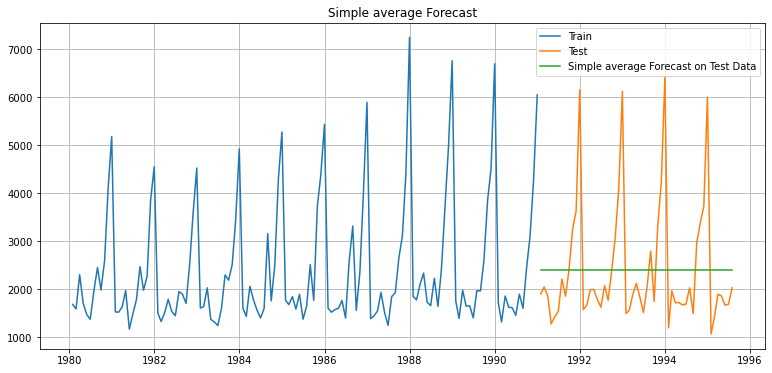

In [38]:
#Create a copy of the original dataset
SA_train = train.copy()
SA_test = test.copy()
#Creating a column in test dataset with value of last entry in train dataset
SA_test['average'] = train['Sparkling'].mean()
display(SA_test['average'].head())
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(SA_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SA_test['average'], label='Simple average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple average Forecast")
plt.grid();

In [39]:
#Model performance

res3 = performance(SA_test['average'],'Simple Average Model')
main_res = pd.concat([main_res,res3])
main_res

For Simple Average Model forecast on the Test Data,  RMSE is 1275.082


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804


###### Moving Average model

In [40]:
#Create a copy of the original dataset
MA = df.copy()

#Create a loop for trailing averages 
for i in range(2,28,4):
    MA[i] = MA['Sparkling'].rolling(i).mean()
MA.head()

,Sparkling,2,6,10,14,18,22,26
Time_Stamp,,,,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,1712,2008.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,1471,1591.5,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Creating train and test set 
MA_train=MA[MA.index.year < 1991] 
MA_test=MA[MA.index.year >= 1991]

In [42]:
#Model performance for all the trailing averages

res4 = performance(MA_test[2],'2 point Moving Average Model')
performance(MA_test[6],'6 point Moving Average Model')
performance(MA_test[10],'10 point Moving Average Model')
performance(MA_test[14],'14 point Moving Average Model')
performance(MA_test[18],'18 point Moving Average Model')
performance(MA_test[22],'22 point Moving Average Model')
performance(MA_test[26],'26 point Moving Average Model')

main_res = pd.concat([main_res,res4])
display(main_res)

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 10 point Moving Average Model forecast on the Test Data,  RMSE is 1337.749
For 14 point Moving Average Model forecast on the Test Data,  RMSE is 1160.537
For 18 point Moving Average Model forecast on the Test Data,  RMSE is 1252.484
For 22 point Moving Average Model forecast on the Test Data,  RMSE is 1308.229
For 26 point Moving Average Model forecast on the Test Data,  RMSE is 1216.284


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684


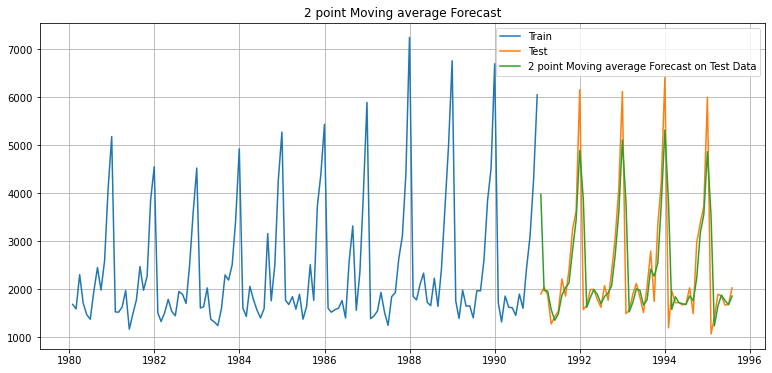

In [43]:
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(MA_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(MA_test[2], label='2 point Moving average Forecast on Test Data')
plt.legend(loc='best')
plt.title("2 point Moving average Forecast")
plt.grid();

###### Single Exponential Model

In [44]:
#Create a copy of the original dataset
SES_train = train.copy()
SES_test = test.copy()

In [46]:
#Define an empty dataframe to store our values from the loop
df_1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_SES = SimpleExpSmoothing(SES_train['Sparkling'], initialization_method='estimated')

#Run a loop with different alpha values to understand which particular value works best for alpha on the test set.
for i in np.arange(0,1.1,0.1):
    model = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model.fittedvalues
    SES_test['predict',i] = model.forecast(steps=55)
    rmse_train_i = mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    rmse_test_i = mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    df_1 = df_1.append({'Alpha Values':i,'Train RMSE':rmse_train_i 
                                      ,'Test RMSE':rmse_test_i}, ignore_index=True)

display(df_1.sort_values(by=['Test RMSE'],ascending=True))

#Adding the least value in SES model to the main results dataframe
df1 = pd.DataFrame({'Test RMSE': [df_1.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1, SimpleExponentialSmoothing'])

main_res = pd.concat([main_res, df1])

,Alpha Values,Train RMSE,Test RMSE
1,0.1,1336.428478,1375.393335
0,0.0,1580.793084,1558.949413
2,0.2,1356.950475,1595.206839
3,0.3,1359.953398,1935.507132
4,0.4,1352.861879,2311.919615
5,0.5,1344.203449,2666.351413
6,0.6,1338.961583,2979.204388
7,0.7,1338.969940,3249.944092
8,0.8,1344.565990,3483.801006
9,0.9,1355.815758,3686.794285


In [47]:
main_res

,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335


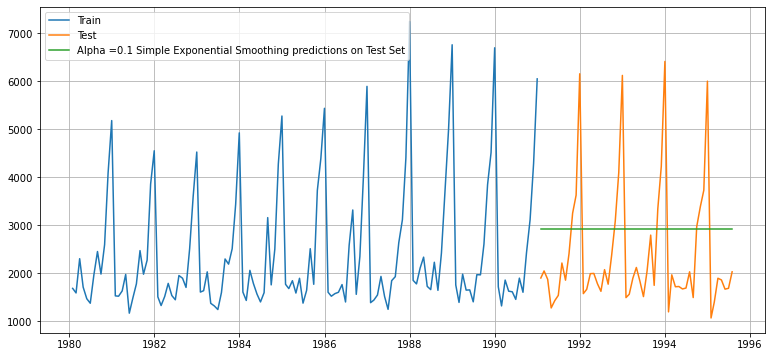

In [49]:
## Plotting on both the Training and Test data
plt.figure(figsize=(13,6))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

###### Double exponential model - Holts method

In [50]:
#Create a copy of the original dataset
DES_train = train.copy()
DES_test = test.copy()

In [57]:
#Define an empty dataframe to store our values from the loop
df_2 = pd.DataFrame({'Alpha Values':[], 'Beta Values':[], 'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_DES = Holt(DES_train['Sparkling'], initialization_method='estimated')

#Run a loop with different alpha, beta values to understand which particular value works best for alpha,beta on the test set.
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        model = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model.fittedvalues
        DES_test['predict',i,j] = model.forecast(steps=55)
        rmse_train = mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        rmse_test = mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        df_2 = df_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_train
                                          ,'Test RMSE':rmse_test}, ignore_index=True)

display(df_2.sort_values(by=['Test RMSE'],ascending=True).head())

# Adding the least value in DES model to the main results dataframe
df2 = pd.DataFrame({'Test RMSE': [df_2.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing'])

main_res = pd.concat([main_res, df2])
display(main_res)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
12,0.1,0.1,1373.320853,1777.734773
13,0.1,0.2,1403.485779,2599.314701
23,0.2,0.1,1413.417928,3611.766690
11,0.1,0.0,1469.010874,3707.262099
22,0.2,0.0,1388.309116,3768.169187


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773


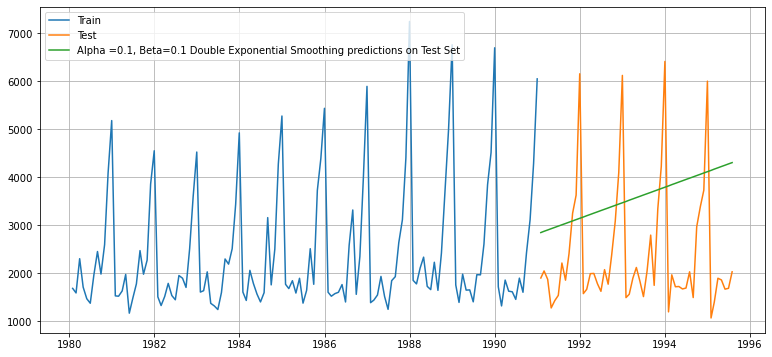

In [58]:
## Plotting on both the Training and Test data
plt.figure(figsize=(13,6))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha =0.1, Beta=0.1 Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

###### Triple Exponential Model - Holt WInters method

In [62]:
#Create a copy of the original dataset
TES_train = train.copy()
TES_test = test.copy()

In [79]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217859719839, 'smoothing_trend': 0.012360783287699654, 'smoothing_seasonal': 0.46071776421989014, 'damping_trend': nan, 'initial_level': 2356.578251726214, 'initial_trend': -0.01853569252838483, 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
       -808.42525514, -815.35024951, -384.23066986,   72.99508063,
       -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [80]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-01-31    1490.574427
1991-02-28    1204.714326
1991-03-31    1688.941107
1991-04-30    1551.450811
1991-05-31    1461.440428
Freq: M, dtype: float64

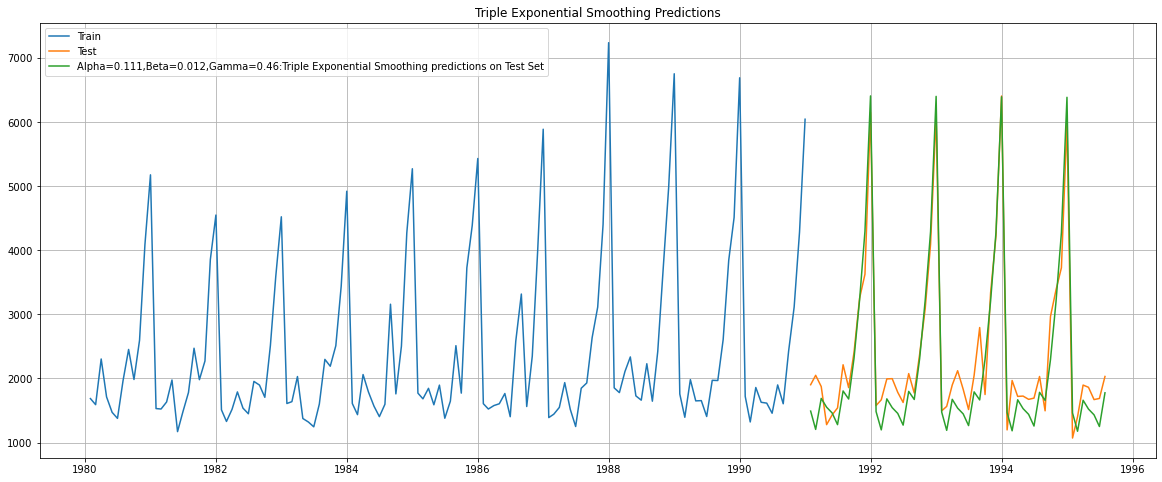

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_predict, label='Alpha=0.111,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [81]:
performance(TES_predict,'Triple Exponential Smoothing')

For Triple Exponential Smoothing forecast on the Test Data,  RMSE is 378.626


,Test RMSE
Triple Exponential Smoothing,378.626239


In [82]:
#Define an empty dataframe to store our values from the loop
df_3 = pd.DataFrame({'Alpha Values':[], 'Beta Values':[], 'Gamma Values': [], 'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',initialization_method='estimated')

#Run a loop with different alpha, beta values to understand which particular value works best for alpha,beta on the test set.
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model.fittedvalues
            TES_test['predict',i,j,k] = model.forecast(steps=55)  
            rmse_train = mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)     
            rmse_test = mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)        
            df_3 = df_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_train,'Test RMSE':rmse_test}
                                                 , ignore_index=True)

display(df_3.sort_values(by=['Test RMSE'],ascending=True).head())

# Adding the least value in DES model to the main results dataframe
df3 = pd.DataFrame({'Test RMSE': [df_3.sort_values(by=['Test RMSE'],ascending=True).values[0][4]]}
                           ,index=['Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing'])

main_res = pd.concat([main_res, df3])
display(main_res)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
166,0.1,0.4,0.1,451.554224,342.934716
265,0.2,0.2,0.1,454.985431,343.121437
315,0.2,0.6,0.7,492.576190,348.792360
606,0.5,0.0,0.1,454.261769,374.352673
970,0.8,0.0,0.2,460.915122,375.492905


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716


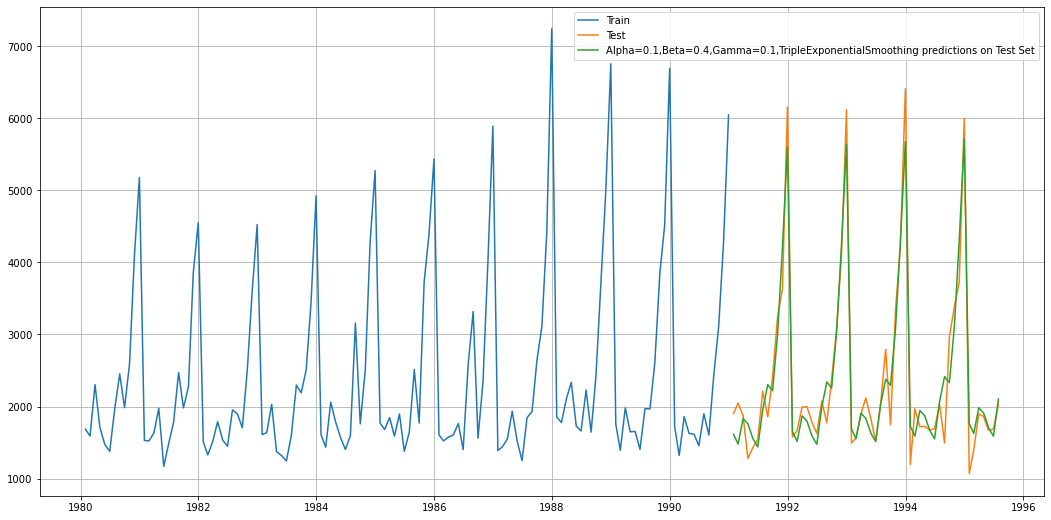

In [68]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict', 0.1, 0.4, 0.1], label='Alpha=0.1,Beta=0.4,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

<b> 1.5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. </b>
<a id='1.5'></a>

In [83]:
## Test for stationarity of the whole series - Augumented Dicky Fuller test


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

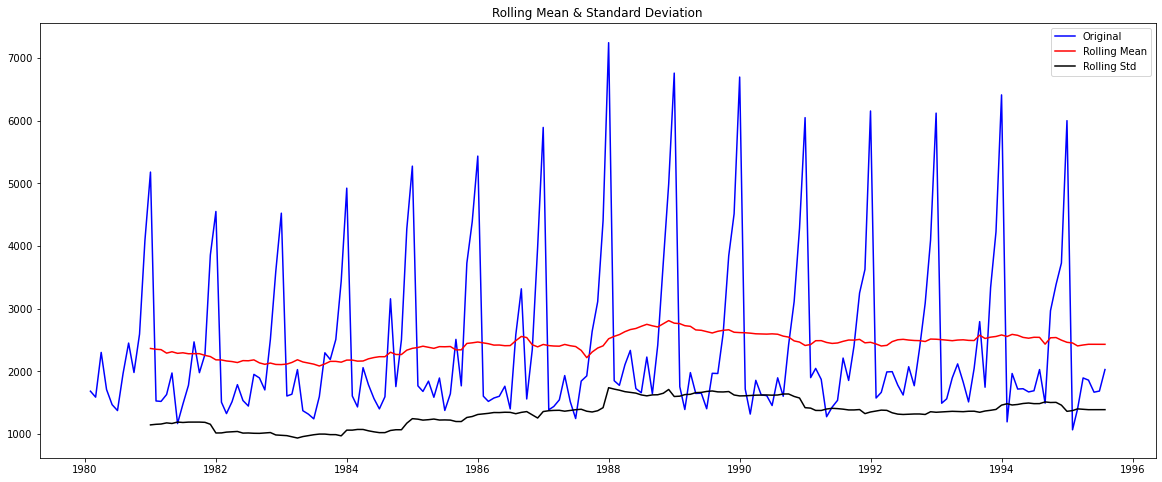

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [84]:
test_stationarity(df['Sparkling'])

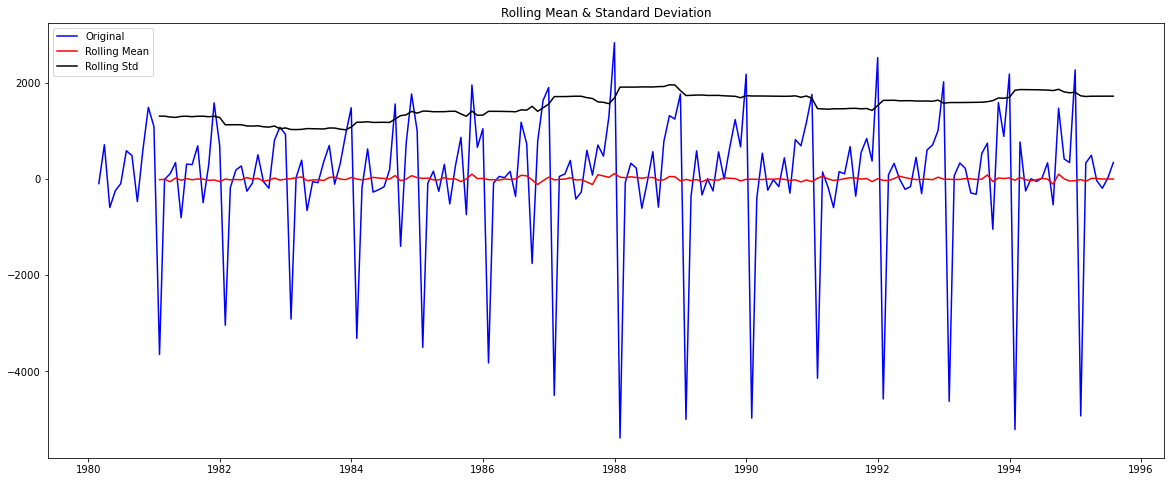

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [85]:
test_stationarity(df['Sparkling'].diff().dropna())

<b> 1.6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. </b>
<a id='1.6'></a>

###### ARIMA

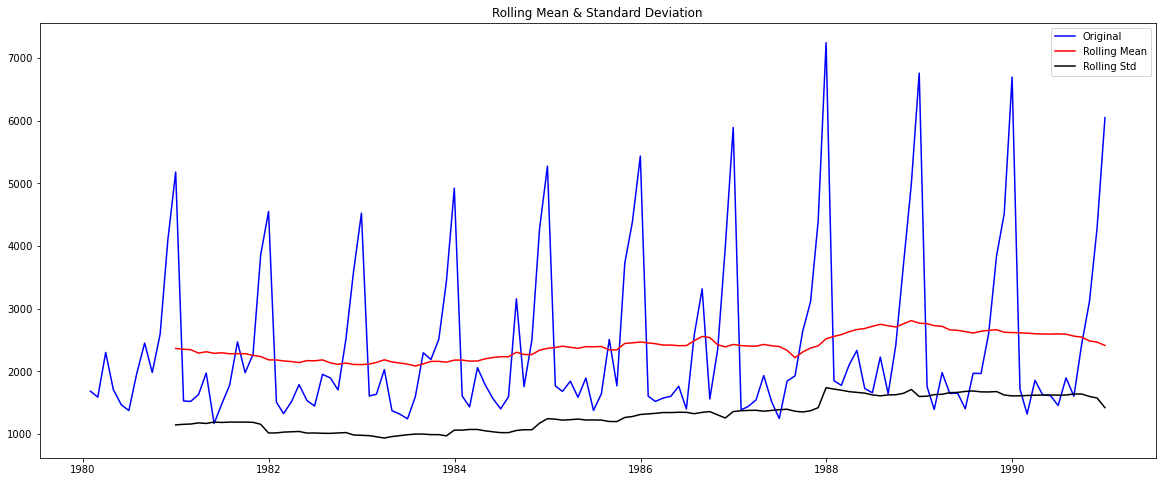

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [86]:
#Before building the model, Test stationarity of train series
test_stationarity(train['Sparkling'])

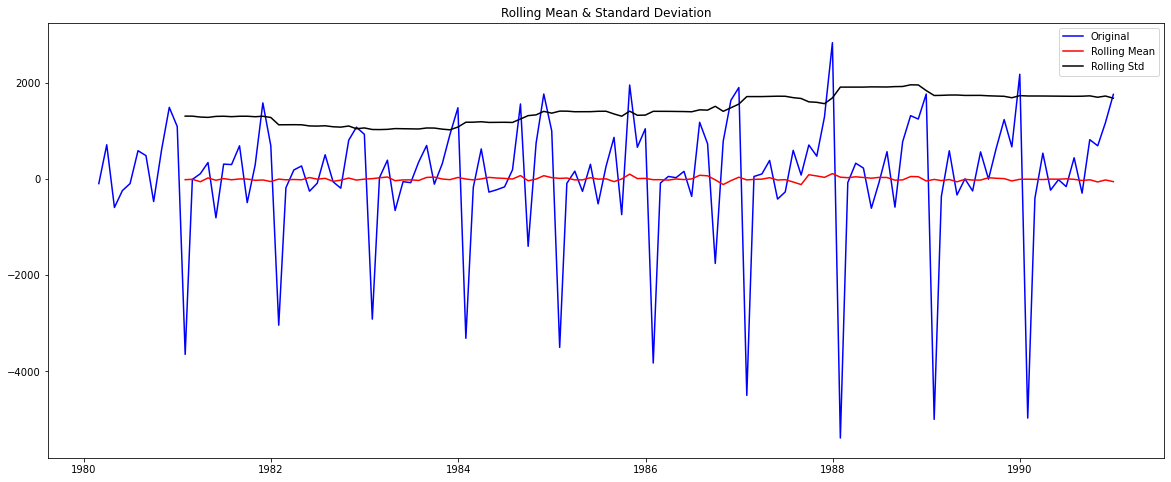

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [87]:
#Taking first order differencing
test_stationarity(train['Sparkling'].diff().dropna())

In [91]:
#Loop for different values of p,d,q
import itertools
p = q = range(0, 4)
d= range(1,2) #Since we took first order differencing
pdq = list(itertools.product(p, d, q))
print('Parameter combinations for the Model:')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Parameter combinations for the Model:
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [92]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [93]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
display(ARIMA_AIC.sort_values(by='AIC',ascending=True).head())

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064421638386
ARIMA(0, 1, 2) - AIC:2232.783097684079
ARIMA(0, 1, 3) - AIC:2233.0166051377305
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.0139453511433
ARIMA(1, 1, 2) - AIC:2233.597647121549
ARIMA(1, 1, 3) - AIC:2234.574141546228
ARIMA(2, 1, 0) - AIC:2262.035600097813
ARIMA(2, 1, 1) - AIC:2232.360489883237
ARIMA(2, 1, 2) - AIC:2210.618138997592
ARIMA(2, 1, 3) - AIC:2229.3580937708516
ARIMA(3, 1, 0) - AIC:2259.4715547091446
ARIMA(3, 1, 1) - AIC:2233.9217616507553
ARIMA(3, 1, 2) - AIC:2228.927639204701
ARIMA(3, 1, 3) - AIC:2225.661558525075


,param,AIC
10,"(2, 1, 2)",2210.618139
15,"(3, 1, 3)",2225.661559
14,"(3, 1, 2)",2228.927639
11,"(2, 1, 3)",2229.358094
9,"(2, 1, 1)",2232.360490


In [94]:
#Build the model
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2), freq = 'M')
#Fit the model
results_auto_ARIMA = auto_ARIMA.fit()
#Summary
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.540
Date:                Sat, 27 Mar 2021   AIC                           2210.618
Time:                        08:52:16   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5857      0.517     10.813      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [95]:
#Predict for the test data
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
res5 = performance(predicted_auto_ARIMA[0], 'ARIMA_auto(2,1,2)')

main_res = pd.concat([main_res,res5])
display(main_res)

For ARIMA_auto(2,1,2) forecast on the Test Data,  RMSE is 1374.719


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716
"ARIMA_auto(2,1,2)",1374.718685


###### SARIMA

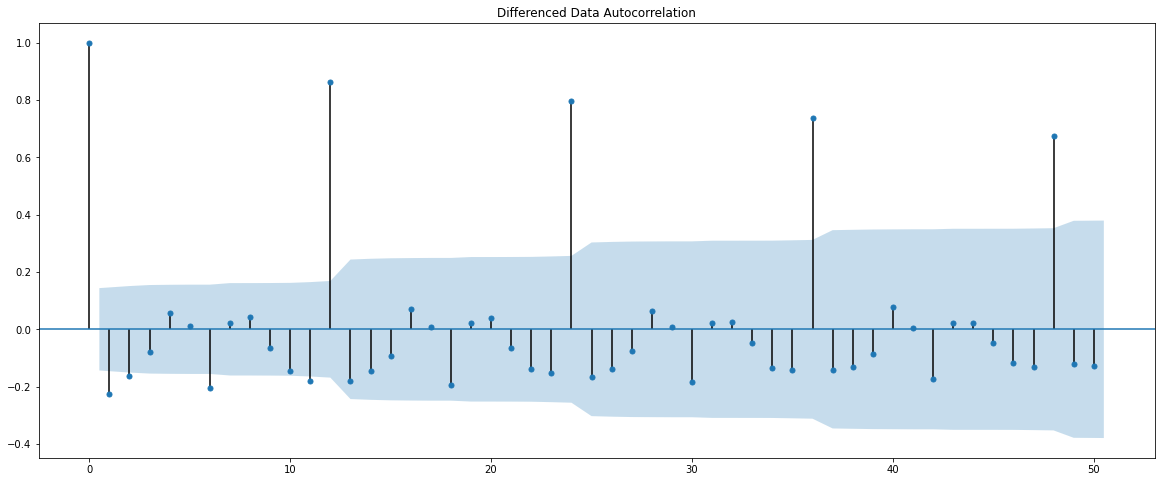

In [96]:
#Check for seasonality
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [122]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Parameter combinations for the Model:')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Parameter combinations for the Model:
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)


In [98]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [99]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844812
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.15336402367
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3891.490487872489
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.9824851895298
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.862633467847
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574256013
SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:3006.9270899712783
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388242
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791594
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3282.543021455055
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908185784
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621306717
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:5995.240849246358
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609596
SARIMA(0, 1, 0)x

In [118]:
SARIMA_AIC[SARIMA_AIC['AIC'] > 1219].sort_values(by=['AIC']).head()

,param,seasonal,AIC
478,"(3, 1, 2)","(3, 1, 2, 12)",1219.259979
412,"(3, 1, 0)","(3, 1, 0, 12)",1227.463082
381,"(2, 1, 3)","(3, 1, 1, 12)",1227.825132
316,"(2, 1, 1)","(3, 1, 0, 12)",1228.313277
348,"(2, 1, 2)","(3, 1, 0, 12)",1228.397168


In [121]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Sat, 27 Mar 2021   AIC                           1219.260
Time:                                    10:16:49   BIC                           1245.462
Sample:                                         0   HQIC                          1229.765
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7556      0.151     -5.013      0.000      -1.051      -0.460
ar.L2          0.1169      0.185   

In [123]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))
res6 = performance(predicted_auto_SARIMA.predicted_mean, 'SARIMA_auto(3,1,2)x(3,1,2,12)')
res6
main_res = pd.concat([main_res,res6])
display(main_res)

For SARIMA_auto(3,1,2)x(3,1,2,12) forecast on the Test Data,  RMSE is 329.535


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716
"ARIMA_auto(2,1,2)",1374.718685
"SARIMA_auto(3,1,2)x(3,1,2,12)",329.534923


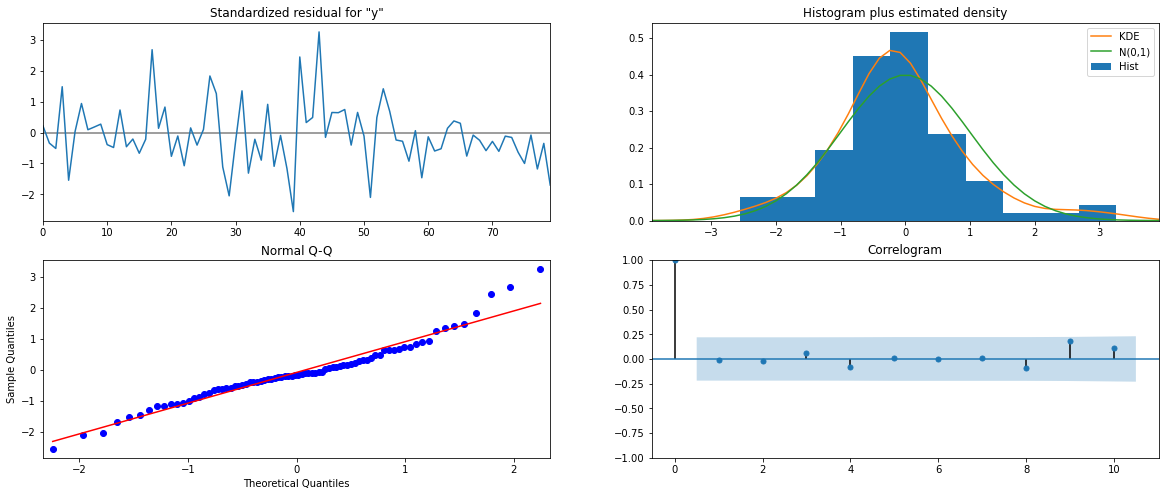

In [124]:
results_auto_SARIMA.plot_diagnostics();

In [125]:
test1 = test.copy()
test1['pred'] = predicted_auto_SARIMA.predicted_mean
test1.head()

,Sparkling,pred
Time_Stamp,,
1991-01-31,1902,1510.229869
1991-02-28,2049,1431.673648
1991-03-31,1874,1850.402110
1991-04-30,1279,1781.972464
1991-05-31,1432,1550.445059


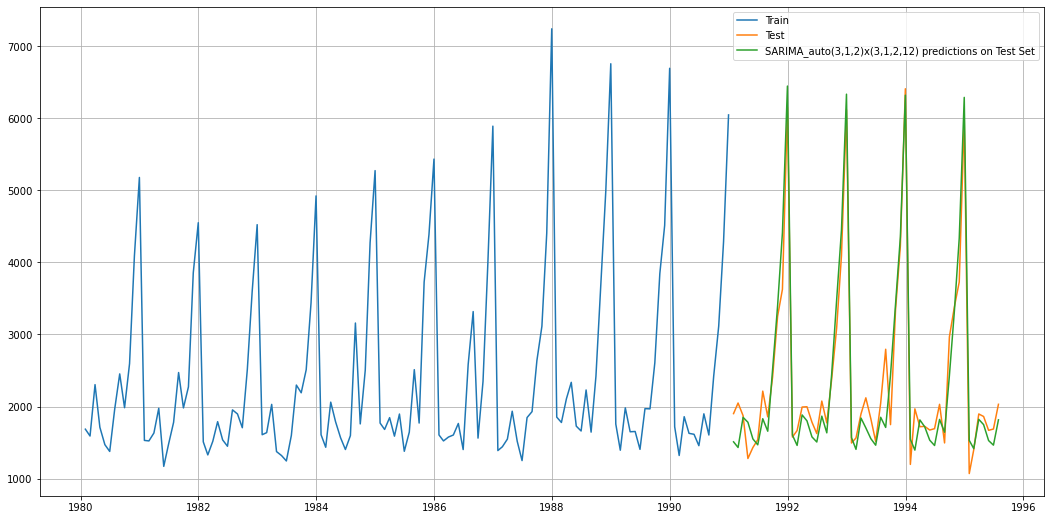

In [126]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test1['pred'], label='SARIMA_auto(3,1,2)x(3,1,2,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

<b> 1.7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE. </b>
<a id='1.7'></a>

###### ARIMA

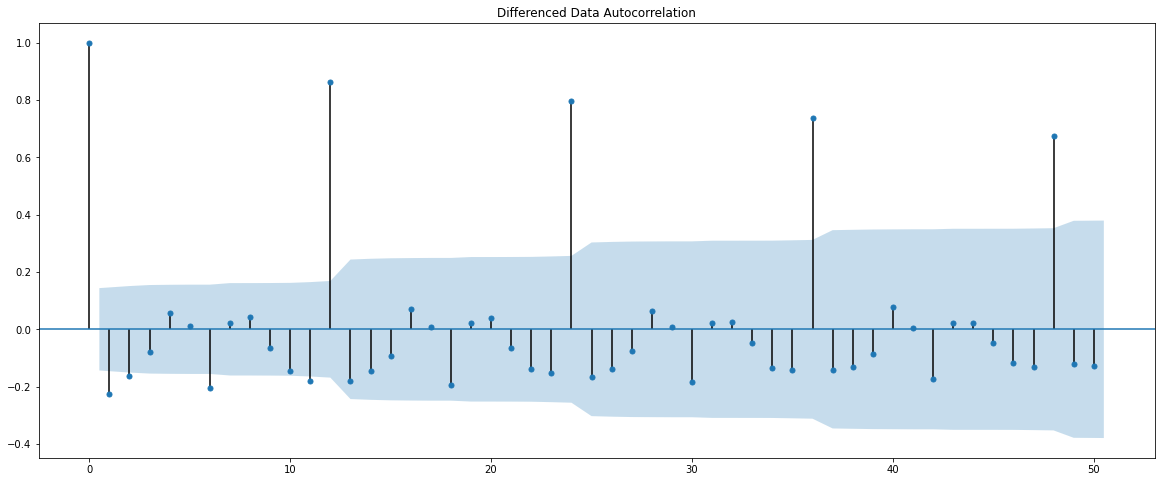

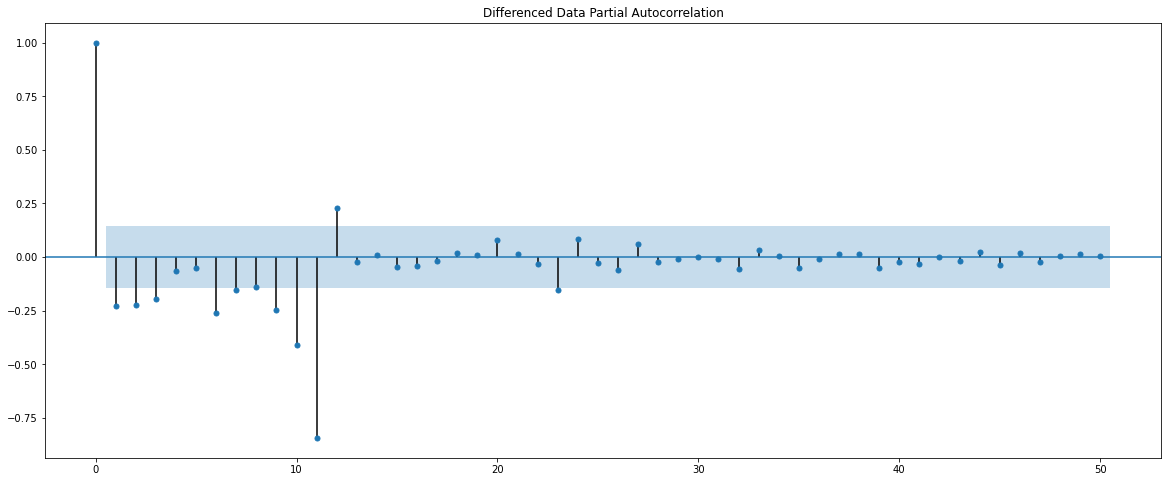

In [127]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method ='ywmle')
plt.show()

In [128]:
#Build the model
manual_ARIMA = ARIMA(train, order=(3,1,2), freq ='M')
#Fit the model
results_manual_ARIMA = manual_ARIMA.fit()
#Summary
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.127
Date:                Sat, 27 Mar 2021   AIC                           2228.928
Time:                        11:11:33   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9842      3.646      1.641      0.101      -1.162      13.130
ar.L1.D.Sparkling    -0.4415   6.99e-06  -6.32e+04      0.000      -0.442      -0.441
ar.L2.D.Sparkling     0.

In [129]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
res7 = performance(predicted_manual_ARIMA[0], 'ARIMA_manual(3,1,2)')

main_res = pd.concat([main_res,res7])
display(main_res)

For ARIMA_manual(3,1,2) forecast on the Test Data,  RMSE is 1379.027


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716
"ARIMA_auto(2,1,2)",1374.718685
"SARIMA_auto(3,1,2)x(3,1,2,12)",329.534923
"ARIMA_manual(3,1,2)",1379.027184


###### SARIMA

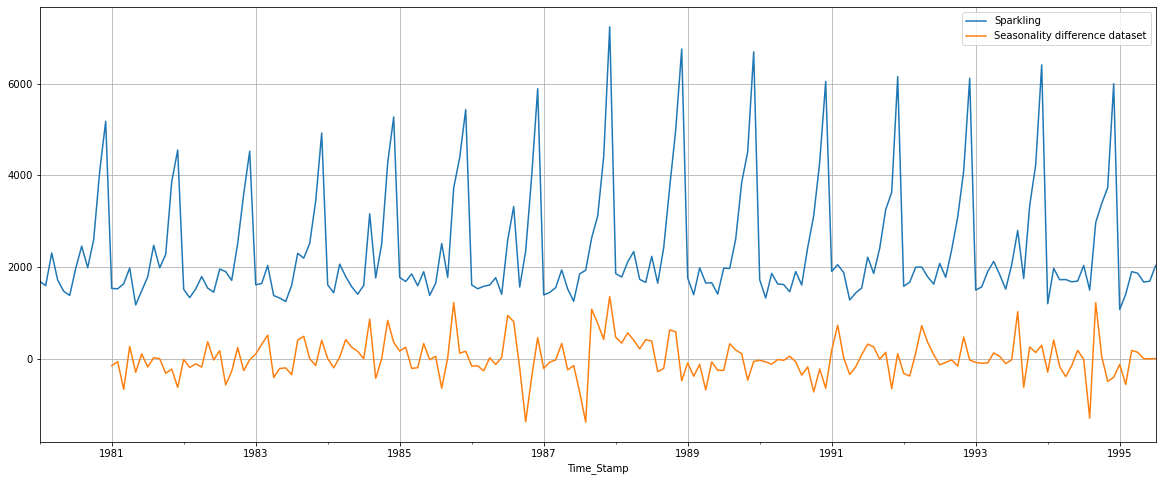

In [131]:
df.plot(label = 'Original dataset')
(df['Sparkling'].diff(12).dropna()).plot(label = 'Seasonality difference dataset')
plt.legend()
plt.grid();

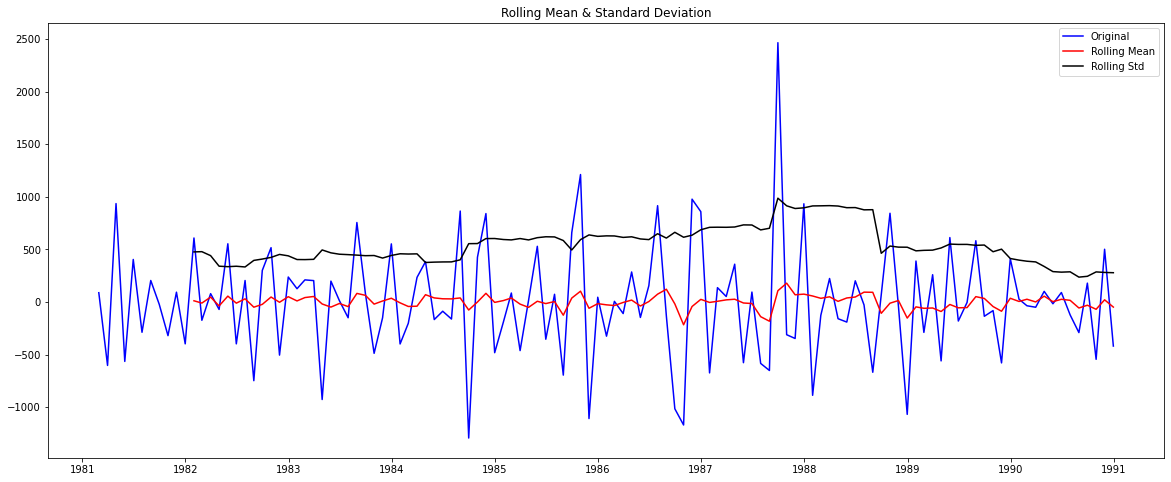

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [132]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff().dropna())

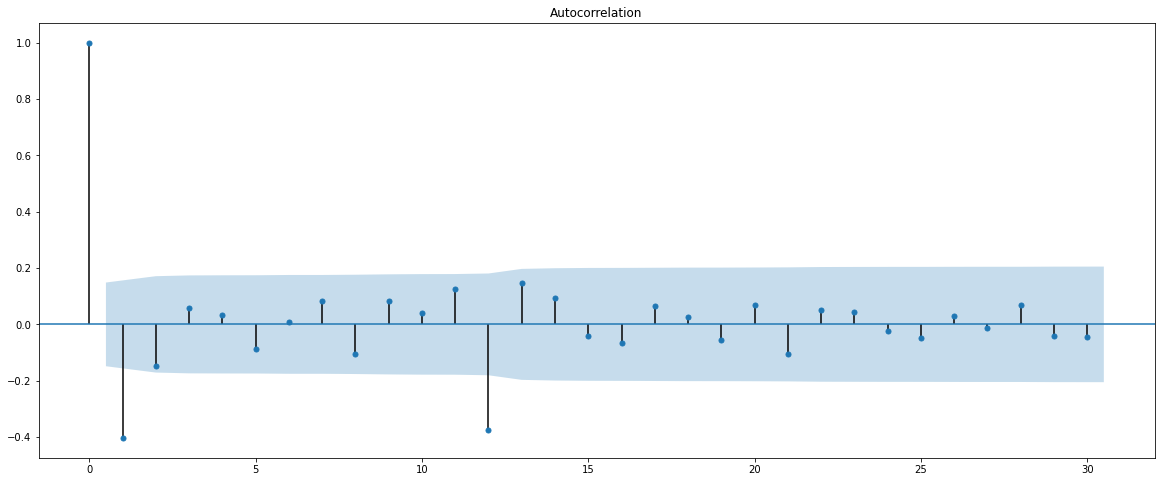

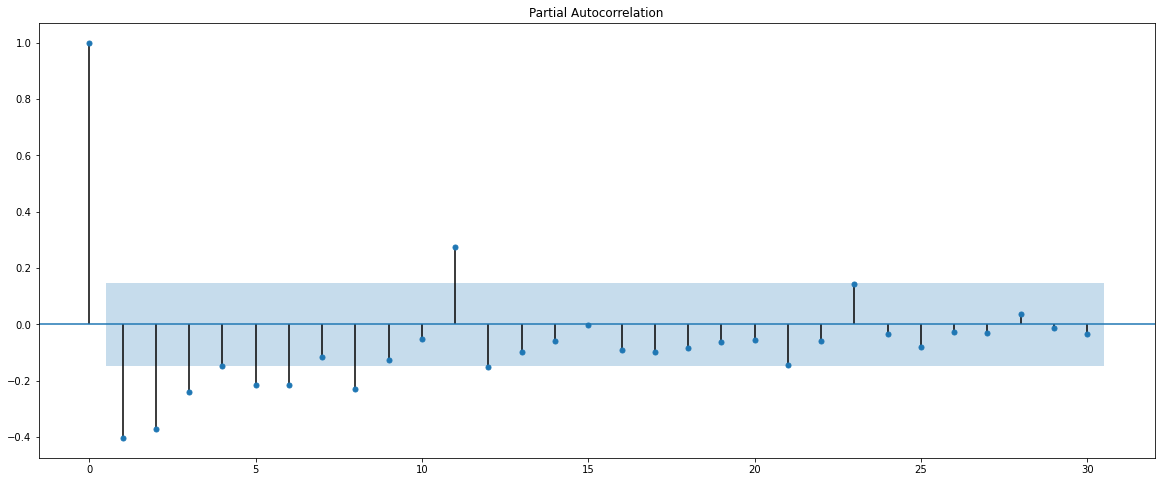

In [133]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, method ='ywmle');

In [163]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(0, 1, [], 12)   Log Likelihood                -866.086
Date:                             Sat, 27 Mar 2021   AIC                           1744.171
Time:                                     11:44:34   BIC                           1760.693
Sample:                                          0   HQIC                          1750.878
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6859      0.090     -7.650      0.000      -0.862      -0.510
ar.L2          0.1495      

In [164]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
res8 = performance(predicted_manual_SARIMA.predicted_mean, 'SARIMA_manual(3,1,2)x(0,1,0,12)')
res8
main_res = pd.concat([main_res,res8])
display(main_res)


For SARIMA_manual(3,1,2)x(0,1,0,12) forecast on the Test Data,  RMSE is 302.241


,Test RMSE
Linear Regression,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2 point Moving Average Model,813.400684
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716
"ARIMA_auto(2,1,2)",1374.718685
"SARIMA_auto(3,1,2)x(3,1,2,12)",329.534923
"ARIMA_manual(3,1,2)",1379.027184


In [165]:
test2 = test.copy()
test2['pred'] = predicted_manual_SARIMA.predicted_mean
test2.head()

,Sparkling,pred
Time_Stamp,,
1991-01-31,1902,1487.839047
1991-02-28,2049,1410.736342
1991-03-31,1874,1802.869423
1991-04-30,1279,1707.232694
1991-05-31,1432,1569.661471


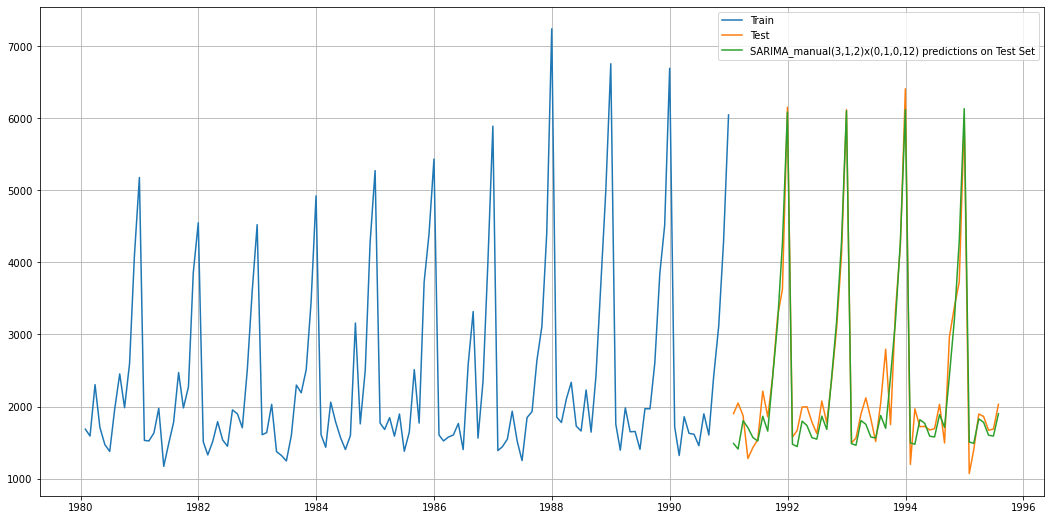

In [170]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test2['pred'], label='SARIMA_manual(3,1,2)x(0,1,0,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

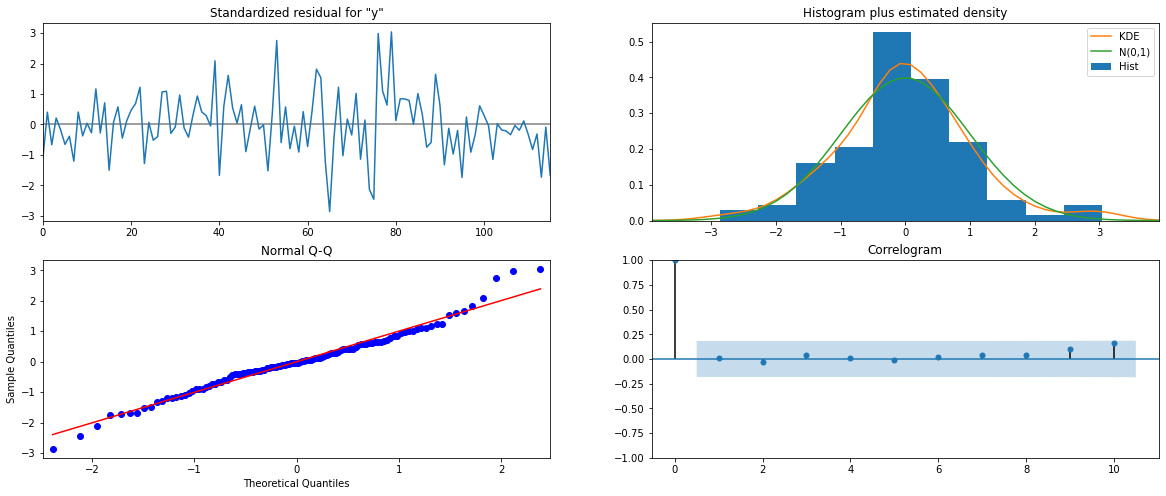

In [171]:
results_manual_SARIMA.plot_diagnostics();

<b> 1.8) Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data. </b>
<a id='1.8'></a>

In [172]:
main_res.sort_values(by = 'Test RMSE', ascending = True)

,Test RMSE
"SARIMA_manual(3,1,2)x(0,1,0,12)",302.241084
"SARIMA_auto(3,1,2)x(3,1,2,12)",329.534923
"Alpha=0.1, Beta=0.4, Gamma=0.1, TripleExponentialSmoothing",342.934716
2 point Moving Average Model,813.400684
Simple Average Model,1275.081804
"ARIMA_auto(2,1,2)",1374.718685
"Alpha=0.1, SimpleExponentialSmoothing",1375.393335
"ARIMA_manual(3,1,2)",1379.027184
Linear Regression,1389.135175
"Alpha=0.1, Beta=0.1, DoubleExponentialSmoothing",1777.734773


<b> 1.9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. </b>
<a id='1.9'></a>

In [173]:
#Building the best optimum model on full data
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(0, 1, [], 12)   Log Likelihood               -1275.269
Date:                             Sat, 27 Mar 2021   AIC                           2562.538
Time:                                     12:25:07   BIC                           2581.388
Sample:                                 01-31-1980   HQIC                          2570.186
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8370      0.069    -12.197      0.000      -0.971      -0.702
ar.L2          0.0237      

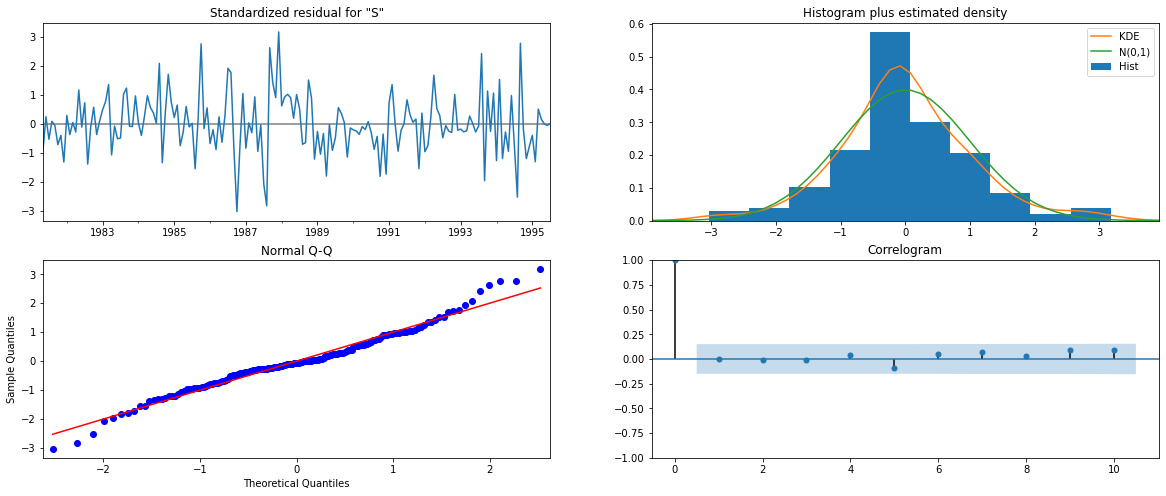

In [174]:
results_full_data_model.plot_diagnostics();

In [175]:
#Prediction for 12 months into the future

predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [176]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1519.558782,413.073142,709.950301,2329.167262
1995-09-30,2967.230687,418.531212,2146.924584,3787.536790
1995-10-31,3405.826609,420.617776,2581.430917,4230.222300
1995-11-30,3730.240897,421.416566,2904.279606,4556.202189
1995-12-31,6018.084096,421.912364,5191.151057,6845.017135
1996-01-31,1072.885279,422.593403,244.617430,1901.153129
1996-02-29,1419.591997,422.925160,590.673915,2248.510079
1996-03-31,1901.237677,423.400257,1071.388422,2731.086932
1996-04-30,1878.363772,423.608241,1048.106877,2708.620667
1996-05-31,1675.353018,423.946287,844.433564,2506.272473


In [177]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 575.9481391778376


In [178]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

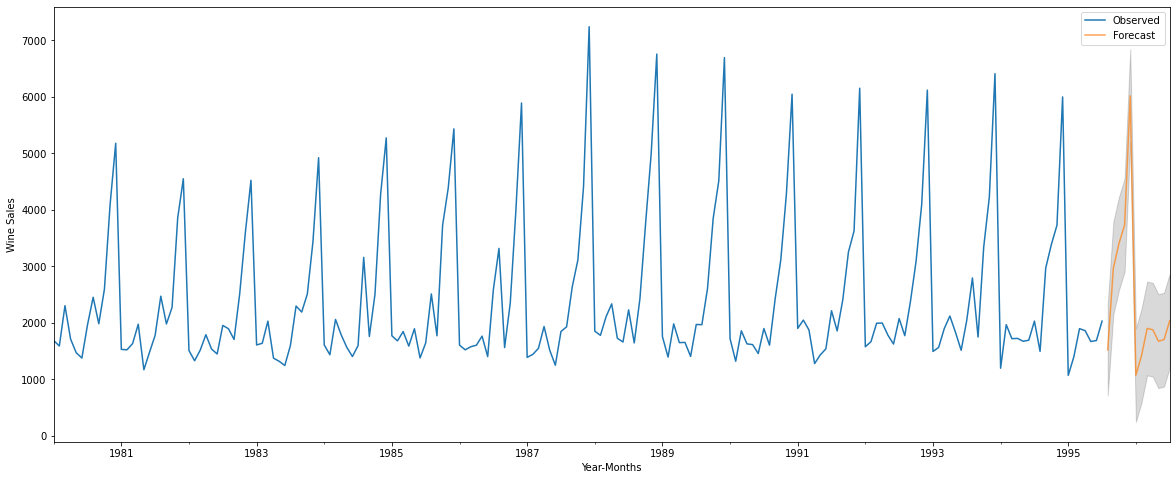

In [179]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()

<b> 1.10) Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. </b>
<a id='1.10'></a>

The objective of this case study is to analyse and forecast wine sales for next 12 months from the end date in the dataset. 


<b>Initial Analysis of the data:</b>

                •	We can observe several characteristics of the series: first, that it maintains a slightly similar behaviour, without radical changes in the trend; Secondly, it presents a strong seasonal behaviour, which explains these ups and downs, far from the average of the series.
                •	No outliers as the peaks are fully described by the seasonality present in the dataset.
                •	Additive model decomposition is preferred because the seasonality does not change over time, this can be confirmed by the quarterly plot as seen before. 
                •	There was a dip in wines sales till the year 1982 which then took an incremental change till 1988.
                •	First order differencing was needed to make the series stationary.


<b>Model building findings:</b>


Taking into consideration the initial analysis done, several models were built like Linear regression, Naïve model, Simple average, moving average with different rolling windows, various exponential models and ARIMA/SARIMA. 


Out of the models built, Naïve forecast is the worst in terms of seasonal forecasting followed by double exponential smoothing and linear regression models. SARIMA outperforms all other models, in that manually selected parameters for SARIMA model gave the best results in terms of RMSE. The baseline prediction for the dataset resulted in an RMSE of 302.24. The chosen model forecasted the next 12 months with an RMSE of 575. At 95% confidence, range of the sales is also predicted.


We have considered only sales of the wine for that particular month, if there were other variables like location, outlet type and customers age could also be some important factors affecting the sales which can help us better in forecasting.


<b>Business recommendations:</b>


From the insights gathered during the analysis, wine sales see its highest in the autumn with demand increasing till December and drops off after holidays. This can be due to the weather conditions; high temperature can cause spoilage. Therefore, selling or shipping on wine in such conditions can shut its flavour development down. Taking advantage of the weather in the second half of the year would be the best way going forward to increase the company’s wine sales.
More than 50% of the sales is in the third and fourth quarter. Since there is no decrease in the trend forecasted for the future months, ABC Estate wines can concentrate on boosting their wine sales in the months of demand. In order to implement this, ABC estate wines can:


            •	Offering a sale in a smart way like digital shopping offers with free shipping, sale in places which are more often visited by the people.
            •	Promoting wine gift sets and innovative wine bags for specific occasions since the second half of the year is having more holidays.
            •	Introducing winery visits.
            •	Host or join events which can include wine tasting. So that people attending the event can be offered a deal in the wine package.
            •	Digital media marketing campaigns would definitely improve the sales.
            
            
Since, Sparkling wine is known for as a gift during the holiday season especially the last days before New year is a great opportunity for ABC estate wines. By implementing a couple or some of the ideas together from above would be benefitable for the company.
